In [1]:
%load_ext autoreload
%autoreload 2
%pip install tqdm
%pip install torch torchinfo torchvision
%pip install pandas
%pip install imageio
%pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from torch import nn
from torchinfo import summary
import torch.optim.lr_scheduler as lrs
# torch.set_grad_enabled(True)

import time

import sys
import os

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))


from data_loader import plants_dataloader
from model3 import PlantNet
from train import train
from generator import PlantLoss

In [3]:
csv_file = r"../data/images.1000.csv"
csv_eval = r"../data/images.200.csv"

In [4]:
BASE_EPOCHS = 50
RESET = False

In [5]:
dl_train = plants_dataloader(csv_file, batch_size=6, device="cuda")
dl_test = plants_dataloader(csv_eval, batch_size=6, device="cuda")

print(dl_train.dataset[0])

loss_fn = PlantLoss()
loss_fn.zero_grad()

(tensor([[[[  0.,   0.,   0.,  ..., 199., 199., 199.],
          [  0.,   0.,   0.,  ..., 199., 199., 199.],
          [  0.,   0.,   0.,  ..., 199., 199., 199.],
          ...,
          [  0.,   0.,   0.,  ..., 168., 168., 166.],
          [  0.,   0.,   0.,  ..., 168., 169., 167.],
          [  0.,   0.,   0.,  ..., 101., 108., 110.]],

         [[  0.,   0.,   0.,  ..., 237., 237., 237.],
          [  0.,   0.,   0.,  ..., 238., 238., 238.],
          [  0.,   0.,   0.,  ..., 237., 237., 237.],
          ...,
          [  0.,   0.,   0.,  ..., 228., 229., 228.],
          [  0.,   0.,   0.,  ..., 229., 230., 229.],
          [  0.,   0.,   0.,  ..., 162., 172., 177.]],

         [[  0.,   0.,   0.,  ..., 253., 253., 253.],
          [  0.,   0.,   0.,  ..., 253., 253., 253.],
          [  0.,   0.,   0.,  ..., 253., 253., 253.],
          ...,
          [  0.,   0.,   0.,  ..., 252., 253., 252.],
          [  0.,   0.,   0.,  ..., 253., 253., 252.],
          [  0.,   0.,   0.,  ..

In [6]:
list_activations = [
    nn.ELU,
    nn.Hardshrink,
    nn.Hardsigmoid,
    nn.Hardtanh,
    nn.Hardswish,
    nn.LeakyReLU,
    nn.LogSigmoid,
    nn.PReLU,
    nn.ReLU,
    nn.ReLU6,
    nn.RReLU,
    nn.SELU,
    nn.CELU,
    nn.GELU,
    nn.Sigmoid,
    nn.SiLU,
    nn.Mish,
    nn.Softplus,
    nn.Softshrink,
    nn.Softsign,
    nn.Tanh,
    nn.Tanhshrink,
    nn.Softmin,
    nn.Softmax,
    nn.LogSoftmax,
]


import random

random_act = lambda : random.choice(list_activations)()



In [7]:

if RESET or not "listnets1" in locals():
    listnets1 = (
        [PlantNet()]
        # [OriginalNet(activation) for activation in list_activations] + [OriginalNet(random_act) for _ in range(5)]
        # if FULL==Training.FULL
        # else [
        #     OriginalNet(nn.RReLU),
        #     OriginalNet(nn.LeakyReLU),
        #     OriginalNet(nn.CELU),
        #     OriginalNet(nn.Mish),
        #     OriginalNet(nn.ELU),
        #     OriginalNet(nn.Hardtanh),
        #     OriginalNet(nn.Tanh),
        # ]
        # if FULL == Training.PARTIAL
        # else [OriginalNet(nn.RReLU)]
    )

    names1 = (
        ["PlantNetv1"]
        # [str(activation()) for activation in list_activations] + [f"random{n}" for n in range(5)]
        # if FULL==Training.FULL
        # else [
        #     "RReLU",
        #     "LeakyReLU",
        #     "CELU",
        #     "Mish",
        #     "ELU",
        #     "Hardtanh",
        #     "Tanh",
        # ]
        # if FULL == Training.PARTIAL
        # else ["nn.LeakyReLU"]
    )



print("\n\nvs\n\n".join(str(summary(net, (1, 3, 640, 480))) for net in listnets1))

Layer (type:depth-idx)                   Output Shape              Param #
PlantNet                                 [36, 2]                   --
├─Sequential: 1-1                        [1, 36, 320, 240]         --
│    └─Conv2d: 2-1                       [1, 9, 640, 480]          6,084
│    └─RReLU: 2-2                        [1, 9, 640, 480]          --
│    └─Conv2d: 2-3                       [1, 18, 640, 480]         4,068
│    └─MaxPool2d: 2-4                    [1, 18, 320, 240]         --
│    └─Conv2d: 2-5                       [1, 36, 320, 240]         5,868
├─Sequential: 1-2                        [1, 36, 5]                --
│    └─RReLU: 2-6                        [1, 36, 320, 240]         --
│    └─Centroids2d: 2-7                  [1, 36, 5]                36
│    │    └─Normalize2d: 3-1             [36, 320, 240]            --
│    │    └─Normalize2d: 3-2             [36, 320, 240]            --
│    └─RReLU: 2-8                        [1, 36, 5]                --
├─Cent

In [8]:
if RESET or not "results1" in locals():
    results1: list[dict[str, list[float]]] = [
        {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": [], "move_final_acc":[]}
        for _ in range(len(listnets1))
    ]

    optimizers1 = [torch.optim.Adam(net.parameters(), lr=.0005) for net in listnets1]
    schedulers1 = [lrs.ExponentialLR(optimizer, .999) for optimizer in optimizers1]

    loss_fn = PlantLoss()


In [9]:
assert len(names1)==len(listnets1)

if RESET or not "times1" in locals():
    times1 = []
begin = len(times1)

for net, optimizer, scheduler, result, name in zip(
    listnets1, optimizers1, schedulers1, results1, names1
):
    # print(f"Training model {name}...{(len(times1)+1)%len(listnets1)}/{len(listnets1)}")
    print(f"Training model {name}...{len(times1)-begin+1}/{len(listnets1)}")

    # torch.cuda.empty_cache()
    time_taken = time.time()
    result = train(
        net,
        dl_train,
        dl_test,
        loss_fn,
        optimizer,
        scheduler,
        result,
        device="cuda",
        epochs=BASE_EPOCHS,
    )
    time_taken = time.time() - time_taken
    print(f"total time: {time_taken}")
    times1.append(time_taken)

Training model PlantNetv1...1/1
Starting epoch 1/10


  0%|          | 0/167 [00:00<?, ?it/s]

100%|██████████| 34/34 [00:08<00:00,  3.93it/s]


Epoch: 1/10 | train_loss: 0.140956 | train_acc: 0.859044 | test_loss: 0.020831 | test_acc: 0.979169 | lr: 0.000500
Starting epoch 2/10


100%|██████████| 34/34 [00:08<00:00,  3.95it/s]


Epoch: 2/10 | train_loss: 0.021778 | train_acc: 0.978222 | test_loss: 0.026836 | test_acc: 0.973164 | lr: 0.000500
Starting epoch 3/10


100%|██████████| 34/34 [00:08<00:00,  3.92it/s]


Epoch: 3/10 | train_loss: 0.021755 | train_acc: 0.978245 | test_loss: 0.023129 | test_acc: 0.976871 | lr: 0.000499
Starting epoch 4/10


100%|██████████| 34/34 [00:08<00:00,  3.92it/s]


Epoch: 4/10 | train_loss: 0.022121 | train_acc: 0.977879 | test_loss: 0.022637 | test_acc: 0.977363 | lr: 0.000499
Starting epoch 5/10


100%|██████████| 34/34 [00:08<00:00,  3.96it/s]


Epoch: 5/10 | train_loss: 0.021023 | train_acc: 0.978977 | test_loss: 0.020334 | test_acc: 0.979666 | lr: 0.000498
Starting epoch 6/10


100%|██████████| 34/34 [00:08<00:00,  3.95it/s]


Epoch: 6/10 | train_loss: 0.020798 | train_acc: 0.979202 | test_loss: 0.019942 | test_acc: 0.980058 | lr: 0.000498
Starting epoch 7/10


100%|██████████| 34/34 [00:08<00:00,  3.93it/s]


Epoch: 7/10 | train_loss: 0.022375 | train_acc: 0.977625 | test_loss: 0.018101 | test_acc: 0.981899 | lr: 0.000497
Starting epoch 8/10


100%|██████████| 34/34 [00:09<00:00,  3.76it/s]


Epoch: 8/10 | train_loss: 0.391072 | train_acc: 0.608928 | test_loss: 0.098140 | test_acc: 0.901860 | lr: 0.000497
Starting epoch 9/10


100%|██████████| 34/34 [00:08<00:00,  3.93it/s]


Epoch: 9/10 | train_loss: 0.031109 | train_acc: 0.968891 | test_loss: 0.115111 | test_acc: 0.884889 | lr: 0.000496
Starting epoch 10/10


100%|██████████| 34/34 [00:08<00:00,  3.93it/s]


Epoch: 10/10 | train_loss: 0.020239 | train_acc: 0.979761 | test_loss: 0.019037 | test_acc: 0.980963 | lr: 0.000496
Movement evaluation:


100%|██████████| 34/34 [00:08<00:00,  4.00it/s]

[0.9809632967500126, 0.9809632967500126, 0.9809632967500126, 0.9809632967500126, 0.9809632967500126, 0.9809632967500126, 0.9809632967500126]
total time: 898.543702840805


[898.543702840805]
[{'train_loss': [0.1409555658820771, 0.021778264701991023, 0.021755040277487148, 0.022120529718830915, 0.021022955892596416, 0.020797708933381086, 0.022374559375094975, 0.39107227160645547, 0.03110896142389246, 0.020239422962203355], 'train_acc': [0.8590444329969897, 0.9782217351976269, 0.9782449599511609, 0.9778794692661947, 0.9789770448993066, 0.9792022897811707, 0.9776254399807868, 0.6089277299578318, 0.9688910374384441, 0.9797605790064007], 'test_loss': [0.020831427701255855, 0.026836015968857443, 0.023129154161057052, 0.022637159440337735, 0.020333662355209097, 0.01994219930459033, 0.018100773477379012, 0.09814015041817636, 0.11511147197555094, 0.019036705276983625], 'test_acc': [0.9791685710935032, 0.9731639816480524, 0.9768708488520454, 0.9773628431207994, 0.9796663364943337, 0.9800578040235183, 0.9818992264130536, 0.9018598549506244, 0.8848885262713713, 0.9809632967500126], 'move_final_acc': [0.9809632967500126, 0.9809632967500126, 0.9809632967500126, 0.98096

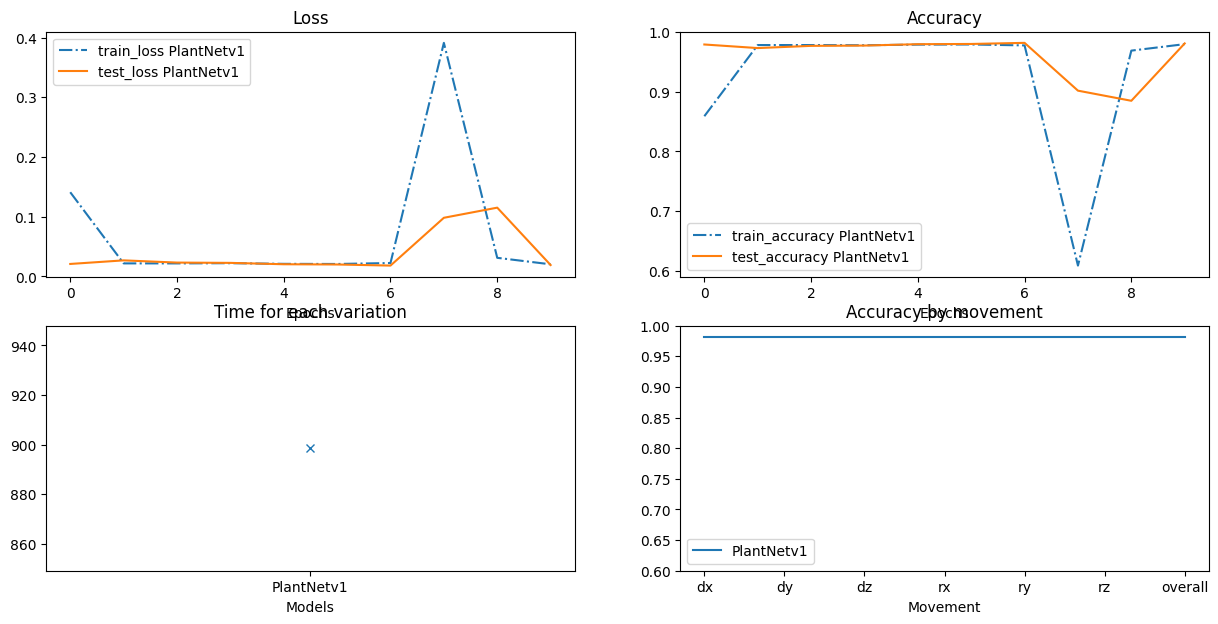

In [10]:
from train import plot_results
print(times1)
print(results1)

plot_results(*results1, names=names1, times=times1)
# resultssplit = [results1[5*i:5*(i+1)] for i in range(int(len(results1)/5+0.99))]
# namessplit = [names1[5*i:5*(i+1)] for i in range(int(len(names1)/5+0.99))]
# timessplit = [times1[5*i:5*(i+1)] for i in range(int(len(times1)/5+0.99))]

# for results_, names_, times_ in zip(resultssplit, namessplit, timessplit):
#     plot_results(*results_, names=names_, times=times_)
# pass

In [11]:
print(os.getcwd())
for net, name in zip(listnets1, names1):
    torch.save(net, f"""saves_models/{name.replace(" ", "").replace("'", "").replace("<", "").replace(">", "")}.{int(time.time())}.pth""")
print("ok")

/home/ubuntu/Documents/polybot.riviera/polybot/riviera/ai
ok
